Sustainable Land Use Classification: Based on land use, crop type, and emissions, you could classify which land use practices are likely to be more sustainable (e.g., low emissions or higher yields per area). This can guide decisions on efficient resource usage.

In [1]:
import requests  #to query the API 
import re  #regular expressions
import pandas as pd   # for dataframes
import json

import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB


In [2]:
land_use = pd.read_csv("SA_landuse.csv")
land_use.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,RL,Land Use,32,Argentina,5110,Area,6602,Agriculture,1961,1961,1000 ha,137829.0,I,Imputed value,NaN
1,RL,Land Use,32,Argentina,5110,Area,6602,Agriculture,1962,1962,1000 ha,136434.0,I,Imputed value,NaN
2,RL,Land Use,32,Argentina,5110,Area,6602,Agriculture,1963,1963,1000 ha,134875.0,I,Imputed value,NaN
3,RL,Land Use,32,Argentina,5110,Area,6602,Agriculture,1964,1964,1000 ha,133297.0,I,Imputed value,NaN
4,RL,Land Use,32,Argentina,5110,Area,6602,Agriculture,1965,1965,1000 ha,131780.0,I,Imputed value,NaN


In [3]:
land_use.Unit.value_counts()

1000 ha       7295
%             6482
ha/cap         868
USD_PPP/ha     851
Name: Unit, dtype: int64

In [6]:
cropland = land_use.loc[land_use["Unit"] == "ha/cap"]
cropland.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
251,RL,Land Use,32,Argentina,7277,Area per capita,6620,Cropland,1961,1961,ha/cap,0.9416,E,Estimated value,NaN
255,RL,Land Use,32,Argentina,7277,Area per capita,6620,Cropland,1962,1962,ha/cap,0.9544,E,Estimated value,NaN
259,RL,Land Use,32,Argentina,7277,Area per capita,6620,Cropland,1963,1963,ha/cap,0.9589,E,Estimated value,NaN
263,RL,Land Use,32,Argentina,7277,Area per capita,6620,Cropland,1964,1964,ha/cap,0.9624,E,Estimated value,NaN
267,RL,Land Use,32,Argentina,7277,Area per capita,6620,Cropland,1965,1965,ha/cap,0.9685,E,Estimated value,NaN


In [50]:
cropland.columns

Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value',
       'Flag', 'Flag Description', 'Note'],
      dtype='object')

In [52]:
cropland = cropland.drop(columns = ['Domain Code', 'Domain', 'Area Code (M49)', 'Element Code',
       'Element', 'Item Code', 'Item', 'Year Code', 'Unit',
       'Flag', 'Flag Description', 'Note'])

In [54]:
cropland = cropland.rename(columns={'Value': 'Cropland (ha/cap)'})
cropland.head()

,Area,Year,Cropland (ha/cap)
251,Argentina,1961,0.9416
255,Argentina,1962,0.9544
259,Argentina,1963,0.9589
263,Argentina,1964,0.9624
267,Argentina,1965,0.9685


In [55]:
cropland.to_csv("cropland.csv")

In [7]:
prod = pd.read_csv("SA_prod_cropandlivestock.csv")
prod.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,32,Argentina,5312,Area harvested,01371,"Almonds, in shell",1961,1961,ha,0.0,M,"Missing value (data cannot exist, not applicable)",NaN
1,QCL,Crops and livestock products,32,Argentina,5510,Production,01371,"Almonds, in shell",1961,1961,t,80.0,E,Estimated value,NaN
2,QCL,Crops and livestock products,32,Argentina,5312,Area harvested,01371,"Almonds, in shell",1962,1962,ha,0.0,M,"Missing value (data cannot exist, not applicable)",NaN
3,QCL,Crops and livestock products,32,Argentina,5510,Production,01371,"Almonds, in shell",1962,1962,t,90.0,E,Estimated value,NaN
4,QCL,Crops and livestock products,32,Argentina,5312,Area harvested,01371,"Almonds, in shell",1963,1963,ha,0.0,M,"Missing value (data cannot exist, not applicable)",NaN


In [8]:
area_harvested = prod.loc[prod["Element"] == "Area harvested"]
area_harvested.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,32,Argentina,5312,Area harvested,01371,"Almonds, in shell",1961,1961,ha,0.0,M,"Missing value (data cannot exist, not applicable)",NaN
2,QCL,Crops and livestock products,32,Argentina,5312,Area harvested,01371,"Almonds, in shell",1962,1962,ha,0.0,M,"Missing value (data cannot exist, not applicable)",NaN
4,QCL,Crops and livestock products,32,Argentina,5312,Area harvested,01371,"Almonds, in shell",1963,1963,ha,0.0,M,"Missing value (data cannot exist, not applicable)",NaN
6,QCL,Crops and livestock products,32,Argentina,5312,Area harvested,01371,"Almonds, in shell",1964,1964,ha,0.0,M,"Missing value (data cannot exist, not applicable)",NaN
8,QCL,Crops and livestock products,32,Argentina,5312,Area harvested,01371,"Almonds, in shell",1965,1965,ha,0.0,M,"Missing value (data cannot exist, not applicable)",NaN


In [16]:
area_harvested.Unit.value_counts()

ha    55892
Name: Unit, dtype: int64

In [10]:
production = prod.loc[prod["Element"] == "Production"]
production.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
1,QCL,Crops and livestock products,32,Argentina,5510,Production,01371,"Almonds, in shell",1961,1961,t,80.0,E,Estimated value,NaN
3,QCL,Crops and livestock products,32,Argentina,5510,Production,01371,"Almonds, in shell",1962,1962,t,90.0,E,Estimated value,NaN
5,QCL,Crops and livestock products,32,Argentina,5510,Production,01371,"Almonds, in shell",1963,1963,t,100.0,E,Estimated value,NaN
7,QCL,Crops and livestock products,32,Argentina,5510,Production,01371,"Almonds, in shell",1964,1964,t,100.0,E,Estimated value,NaN
9,QCL,Crops and livestock products,32,Argentina,5510,Production,01371,"Almonds, in shell",1965,1965,t,110.0,E,Estimated value,NaN


In [15]:
production.Unit.value_counts()

t          95955
1000 No     1022
Name: Unit, dtype: int64

In [17]:
production = production.loc[production["Unit"] == "t"]

In [49]:
prod_totals = production.groupby(['Area', 'Year'])['Value'].sum().reset_index()
prod_totals

,Area,Year,Value
0,Argentina,1961,48489517.56
1,Argentina,1962,48607482.31
2,Argentina,1963,55339474.65
3,Argentina,1964,57610742.18
4,Argentina,1965,54322641.88
...,...,...,...
847,Venezuela (Bolivarian Republic of),2018,16194418.02
848,Venezuela (Bolivarian Republic of),2019,15974778.03
849,Venezuela (Bolivarian Republic of),2020,17505937.25
850,Venezuela (Bolivarian Republic of),2021,17225140.15


In [56]:
prod_totals = prod_totals.rename(columns={'Value': 'Crop Prod Total (tonnes)'})

In [57]:
prod_totals.head()

,Area,Year,Crop Prod Total (tonnes)
0,Argentina,1961,48489517.56
1,Argentina,1962,48607482.31
2,Argentina,1963,55339474.65
3,Argentina,1964,57610742.18
4,Argentina,1965,54322641.88


In [58]:
prod_totals.to_csv("crop_production_totals.csv")

In [ ]:
#Now we have cropland per capita (ha/cap) and total crop production (tonnes) for each country for each year. 

In [19]:
merged_df = pd.merge(area_harvested, production, on=['Area', 'Item', 'Year'], how='left')
print(len(merged_df))
merged_df.head()


55892


,Domain Code_x,Domain_x,Area Code (M49)_x,Area,Element Code_x,Element_x,Item Code (CPC)_x,Item,Year Code_x,Year,...,Area Code (M49)_y,Element Code_y,Element_y,Item Code (CPC)_y,Year Code_y,Unit_y,Value_y,Flag_y,Flag Description_y,Note_y
0,QCL,Crops and livestock products,32,Argentina,5312,Area harvested,01371,"Almonds, in shell",1961,1961,...,32,5510,Production,01371,1961,t,80.0,E,Estimated value,NaN
1,QCL,Crops and livestock products,32,Argentina,5312,Area harvested,01371,"Almonds, in shell",1962,1962,...,32,5510,Production,01371,1962,t,90.0,E,Estimated value,NaN
2,QCL,Crops and livestock products,32,Argentina,5312,Area harvested,01371,"Almonds, in shell",1963,1963,...,32,5510,Production,01371,1963,t,100.0,E,Estimated value,NaN
3,QCL,Crops and livestock products,32,Argentina,5312,Area harvested,01371,"Almonds, in shell",1964,1964,...,32,5510,Production,01371,1964,t,100.0,E,Estimated value,NaN
4,QCL,Crops and livestock products,32,Argentina,5312,Area harvested,01371,"Almonds, in shell",1965,1965,...,32,5510,Production,01371,1965,t,110.0,E,Estimated value,NaN


In [23]:
c_em = pd.read_csv("SA_crop_emissions2.csv")
print(len(c_em))
c_em.head()

29449


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Source Code,Source,Unit,Value,Flag,Flag Description,Note
0,GT,Emissions totals,32,Argentina,7230,Emissions (N2O),5064,Crop Residues,1961,1961,3050,FAO TIER 1,kt,3.7334,E,Estimated value,NaN
1,GT,Emissions totals,32,Argentina,7230,Emissions (N2O),5064,Crop Residues,1962,1962,3050,FAO TIER 1,kt,3.4184,E,Estimated value,NaN
2,GT,Emissions totals,32,Argentina,7230,Emissions (N2O),5064,Crop Residues,1963,1963,3050,FAO TIER 1,kt,4.4910,E,Estimated value,NaN
3,GT,Emissions totals,32,Argentina,7230,Emissions (N2O),5064,Crop Residues,1964,1964,3050,FAO TIER 1,kt,5.2490,E,Estimated value,NaN
4,GT,Emissions totals,32,Argentina,7230,Emissions (N2O),5064,Crop Residues,1965,1965,3050,FAO TIER 1,kt,3.5852,E,Estimated value,NaN


In [26]:
c_em.Element.value_counts()

Emissions (N2O)    12423
Emissions (CH4)    10061
Emissions (CO2)     6965
Name: Element, dtype: int64

In [28]:
total_N20 = c_em.loc[c_em["Element"] == "Emissions (N2O)"]
print(len(total_N20))
total_N20.head()

12423


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Source Code,Source,Unit,Value,Flag,Flag Description,Note
0,GT,Emissions totals,32,Argentina,7230,Emissions (N2O),5064,Crop Residues,1961,1961,3050,FAO TIER 1,kt,3.7334,E,Estimated value,NaN
1,GT,Emissions totals,32,Argentina,7230,Emissions (N2O),5064,Crop Residues,1962,1962,3050,FAO TIER 1,kt,3.4184,E,Estimated value,NaN
2,GT,Emissions totals,32,Argentina,7230,Emissions (N2O),5064,Crop Residues,1963,1963,3050,FAO TIER 1,kt,4.4910,E,Estimated value,NaN
3,GT,Emissions totals,32,Argentina,7230,Emissions (N2O),5064,Crop Residues,1964,1964,3050,FAO TIER 1,kt,5.2490,E,Estimated value,NaN
4,GT,Emissions totals,32,Argentina,7230,Emissions (N2O),5064,Crop Residues,1965,1965,3050,FAO TIER 1,kt,3.5852,E,Estimated value,NaN


In [42]:
total_N20.Item.value_counts()

Crop Residues                      854
Manure Management                  854
Manure left on Pasture             854
Manure applied to Soils            854
Burning - Crop residues            854
Synthetic Fertilizers              836
Fires in humid tropical forests    480
Food Transport                     480
Food Household Consumption         480
Agrifood Systems Waste Disposal    480
Forest fires                       480
Savanna fires                      480
Drained organic soils (N2O)        480
On-farm energy use                 469
Pesticides Manufacturing           448
Food Packaging                     416
Food Retail                        416
Energy                             416
IPPU                               416
Waste                              416
Other                              416
Food Processing                    384
Fertilizers Manufacturing          160
Name: Item, dtype: int64

In [46]:
N20_fert = total_N20.loc[total_N20["Item"] == "Synthetic Fertilizers"]

In [59]:
N20_fert.columns

Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code', 'Item', 'Year Code', 'Year', 'Source Code',
       'Source', 'Unit', 'Value', 'Flag', 'Flag Description', 'Note'],
      dtype='object')

In [62]:
N20_fert = N20_fert.drop(columns = ['Domain Code', 'Domain', 'Area Code (M49)', 'Element Code',
       'Element', 'Item Code', 'Item', 'Year Code',  'Source Code',
       'Source', 'Unit', 'Flag', 'Flag Description', 'Note'])
N20_fert = N20_fert.rename(columns ={ "Value" : "Fertilizer N20 Emissions (kt)"})

In [63]:
N20_fert.head()

,Area,Year,Fertilizer N20 Emissions (kt)
549,Argentina,1961,0.1747
550,Argentina,1962,0.1792
551,Argentina,1963,0.3471
552,Argentina,1964,0.4164
553,Argentina,1965,0.5205


In [64]:
N20_fert.to_csv("N20_fertilizer_emissions.csv")

In [29]:
total_CH4 = c_em.loc[c_em["Element"] == "Emissions (CH4)"]
total_CH4.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Source Code,Source,Unit,Value,Flag,Flag Description,Note
61,GT,Emissions totals,32,Argentina,7225,Emissions (CH4),5060,Rice Cultivation,1961,1961,3050,FAO TIER 1,kt,12.8800,E,Estimated value,NaN
62,GT,Emissions totals,32,Argentina,7225,Emissions (CH4),5060,Rice Cultivation,1962,1962,3050,FAO TIER 1,kt,14.8568,E,Estimated value,NaN
63,GT,Emissions totals,32,Argentina,7225,Emissions (CH4),5060,Rice Cultivation,1963,1963,3050,FAO TIER 1,kt,14.6440,E,Estimated value,NaN
64,GT,Emissions totals,32,Argentina,7225,Emissions (CH4),5060,Rice Cultivation,1964,1964,3050,FAO TIER 1,kt,15.1256,E,Estimated value,NaN
65,GT,Emissions totals,32,Argentina,7225,Emissions (CH4),5060,Rice Cultivation,1965,1965,3050,FAO TIER 1,kt,19.0064,E,Estimated value,NaN


In [43]:
total_CH4.Item.value_counts()

Rice Cultivation                   854
Enteric Fermentation               854
Manure Management                  854
Burning - Crop residues            854
Fires in humid tropical forests    480
Food Transport                     480
Food Household Consumption         480
Agrifood Systems Waste Disposal    480
Forest fires                       480
Fires in organic soils             480
Savanna fires                      480
On-farm energy use                 469
Pesticides Manufacturing           448
Food Packaging                     416
Food Retail                        416
Energy                             416
Waste                              416
Food Processing                    384
IPPU                               320
Name: Item, dtype: int64

In [33]:
total_CO2 = c_em.loc[c_em["Element"] == "Emissions (CO2)"]
total_CO2.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Source Code,Source,Unit,Value,Flag,Flag Description,Note
610,GT,Emissions totals,32,Argentina,7273,Emissions (CO2),67292,Drained organic soils (CO2),1990,1990,3050,FAO TIER 1,kt,5128.514,E,Estimated value,NaN
611,GT,Emissions totals,32,Argentina,7273,Emissions (CO2),67292,Drained organic soils (CO2),1991,1991,3050,FAO TIER 1,kt,5128.514,E,Estimated value,NaN
612,GT,Emissions totals,32,Argentina,7273,Emissions (CO2),67292,Drained organic soils (CO2),1992,1992,3050,FAO TIER 1,kt,5128.514,E,Estimated value,NaN
613,GT,Emissions totals,32,Argentina,7273,Emissions (CO2),67292,Drained organic soils (CO2),1993,1993,3050,FAO TIER 1,kt,5128.514,E,Estimated value,NaN
614,GT,Emissions totals,32,Argentina,7273,Emissions (CO2),67292,Drained organic soils (CO2),1994,1994,3050,FAO TIER 1,kt,5128.514,E,Estimated value,NaN


In [48]:
total_CO2.Item.value_counts()

Drained organic soils (CO2)        480
Forestland                         480
Net Forest conversion              480
Fires in organic soils             480
Food Household Consumption         480
Food Transport                     480
On-farm energy use                 469
Pesticides Manufacturing           448
Agrifood Systems Waste Disposal    416
Food Packaging                     416
Food Retail                        416
Energy                             416
IPPU                               416
Waste                              416
Food Processing                    384
Fertilizers Manufacturing          288
Name: Item, dtype: int64

In [38]:
merged_emissions = pd.merge(total_N20, total_CH4, on=['Area', 'Item', 'Year'], how='left')
merged_emissions = pd.merge(merged_emissions, total_CO2, on=['Area', 'Item', 'Year'], how='left')


len(merged_emissions)

12423

In [41]:
merged_emissions.head()

,Domain Code_x,Domain_x,Area Code (M49)_x,Area,Element Code_x,Element_x,Item Code_x,Item,Year Code_x,Year,...,Element,Item Code,Year Code,Source Code,Source,Unit,Value,Flag,Flag Description,Note
0,GT,Emissions totals,32,Argentina,7230,Emissions (N2O),5064,Crop Residues,1961,1961,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GT,Emissions totals,32,Argentina,7230,Emissions (N2O),5064,Crop Residues,1962,1962,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GT,Emissions totals,32,Argentina,7230,Emissions (N2O),5064,Crop Residues,1963,1963,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GT,Emissions totals,32,Argentina,7230,Emissions (N2O),5064,Crop Residues,1964,1964,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GT,Emissions totals,32,Argentina,7230,Emissions (N2O),5064,Crop Residues,1965,1965,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
merged = pd.merge(cropland, prod_totals, on=['Area', 'Year'], how='left')
merged = pd.merge(merged, N20_fert, on=['Area', 'Year'], how='left')


print(len(merged))
merged.head()

868


,Area,Year,Cropland (ha/cap),Crop Prod Total (tonnes),Fertilizer N20 Emissions (kt)
0,Argentina,1961,0.9416,48489517.56,0.1747
1,Argentina,1962,0.9544,48607482.31,0.1792
2,Argentina,1963,0.9589,55339474.65,0.3471
3,Argentina,1964,0.9624,57610742.18,0.4164
4,Argentina,1965,0.9685,54322641.88,0.5205


In [69]:
print(len(merged))
merged = merged.dropna()
print(len(merged))

868
822


In [71]:
merged.describe(percentiles=[0.25, 0.5, 0.75])

,Year,Cropland (ha/cap),Crop Prod Total (tonnes),Fertilizer N20 Emissions (kt)
count,822.000000,822.000000,8.220000e+02,822.000000
mean,1991.035280,0.370270,1.251755e+08,9.069358
std,17.376254,0.231608,3.003431e+08,24.232832
min,1961.000000,0.057400,2.786337e+04,0.001000
25%,1976.000000,0.179325,5.198371e+06,0.194900
50%,1991.000000,0.329050,1.721623e+07,1.226600
75%,2006.000000,0.481900,5.683384e+07,5.068000
max,2021.000000,1.071500,1.752409e+09,211.883400


In [72]:
merged["Efficiency (kt/cropland)"] = merged["Crop Prod Total (tonnes)"]/1000/merged["Cropland (ha/cap)"]

In [74]:
merged.describe(percentiles=[0.25, 0.5, 0.75])

,Year,Cropland (ha/cap),Crop Prod Total (tonnes),Fertilizer N20 Emissions (kt),Efficiency (kt/cropland)
count,822.000000,822.000000,8.220000e+02,822.000000,8.220000e+02
mean,1991.035280,0.370270,1.251755e+08,9.069358,3.917507e+05
std,17.376254,0.231608,3.003431e+08,24.232832,9.327952e+05
min,1961.000000,0.057400,2.786337e+04,0.001000,4.293277e+02
25%,1976.000000,0.179325,5.198371e+06,0.194900,1.245061e+04
50%,1991.000000,0.329050,1.721623e+07,1.226600,5.425423e+04
75%,2006.000000,0.481900,5.683384e+07,5.068000,2.045033e+05
max,2021.000000,1.071500,1.752409e+09,211.883400,5.495168e+06


In [77]:
def cat_em(value):
    if value > 5.06:
        return 'High'
    if value < 0.194900:
        return "Low"
    else:
        return 'Mid'



def cat_eff(value):
    if value > 2.045033e+05:
        return 'High'
    if value < 1.245061e+04:
        return "Low"
    else:
        return 'Mid'
    
def cat_cl(value):
    if value > 0.481900:
        return 'High'
    if value < 0.179325:
        return "Low"
    else:
        return 'Mid'

merged['Em_label'] = merged['Fertilizer N20 Emissions (kt)'].apply(cat_em)
merged['Eff_label'] = merged['Efficiency (kt/cropland)'].apply(cat_eff)
merged['CL_label'] = merged['Cropland (ha/cap)'].apply(cat_cl)

In [78]:
merged

,Area,Year,Cropland (ha/cap),Crop Prod Total (tonnes),Fertilizer N20 Emissions (kt),Efficiency (kt/cropland),Em_label,Eff_label,CL_label
0,Argentina,1961,0.9416,4.848952e+07,0.1747,5.149694e+04,Low,Mid,High
1,Argentina,1962,0.9544,4.860748e+07,0.1792,5.092989e+04,Low,Mid,High
2,Argentina,1963,0.9589,5.533947e+07,0.3471,5.771141e+04,Mid,Mid,High
3,Argentina,1964,0.9624,5.761074e+07,0.4164,5.986154e+04,Mid,Mid,High
4,Argentina,1965,0.9685,5.432264e+07,0.5205,5.608946e+04,Mid,Mid,High
...,...,...,...,...,...,...,...,...,...
862,South America,2017,0.3189,1.696150e+09,153.3090,5.318752e+06,High,High,Mid
863,South America,2018,0.3179,1.655944e+09,154.0408,5.209010e+06,High,High,Mid
864,South America,2019,0.3174,1.719963e+09,163.5284,5.418913e+06,High,High,Mid
865,South America,2020,0.3189,1.752409e+09,189.3039,5.495168e+06,High,High,Mid


In [79]:
merged.to_csv("CropEffandEmLabels.csv")

In [25]:
#traindf_nolabels (x_train)
x_train = sample_df.drop(columns = 'Source')
#train_labels (y_train)
y_train = sample_df.Source

In [26]:
#testdf_nolabels (x_test)
x_test = df.drop(sample_df.index).drop(columns = 'Source')

#testdf_withlabels?
#x = df.drop(sample_df.index)

#testdf_labels (y_test)
y_test = df.drop(sample_df.index).Source.to_numpy()

In [27]:
MyModelNB= MultinomialNB()
## When you look up this model, you learn that it wants the 
## !!! DF separate from the labels  !!!
MyModelNB.fit(x_train, y_train)
y_pred = MyModelNB.predict(x_test)


In [28]:
y_pred

array(['abcnews', 'nbcnews', 'nbcnews', 'abcnews', 'abcnews',
       'breitbartnews', 'breitbartnews', 'abcnews', 'advocatecom',
       'advocatecom', 'nbcnews', 'nbcnews', 'nbcnews', 'nbcnews',
       'nbcnews', 'abcnews', 'abcnews', 'nbcnews', 'nbcnews',
       'minneapolis star tribune', 'nbcnews', 'nbcnews',
       'minneapolis star tribune', 'minneapolis star tribune', 'abcnews',
       'abcnews', 'abcnews', 'nbcnews', 'nbcnews', 'nbcnews', 'nbcnews',
       'abcnews', 'breitbartnews', 'the daily caller',
       'minneapolis star tribune', 'the daily caller', 'the daily caller',
       'advocatecom', 'minneapolis star tribune', 'abcnews',
       'advocatecom', 'abcnews', 'abcnews', 'abcnews', 'abcnews',
       'abcnews', 'minneapolis star tribune', 'minneapolis star tribune',
       'minneapolis star tribune', 'abcnews', 'abcnews', 'nbcnews',
       'the daily caller', 'nbcnews', 'minneapolis star tribune',
       'nbcnews', 'abcnews', 'nbcnews', 'nbcnews', 'nbcnews', 'nbcnews',
 

In [29]:
## confusion matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print("\nThe confusion matrix is:")
print(cnf_matrix)
print(MyModelNB.predict_proba(x_test))


The confusion matrix is:
[[32  9  5  0 12 27  4]
 [ 9  8  6  1  4  6  1]
 [ 5  0  2  2  2  1  1]
 [10  8  4  0  9  8  1]
 [ 5  2  4  1  5  2  1]
 [ 2  2  3  2  0  7  3]
 [ 3  1  1  0  3  6  1]]
[[0.38280881 0.1257777  0.02582993 ... 0.08325052 0.30995226 0.06825263]
 [0.05998704 0.11794859 0.17907833 ... 0.1559329  0.43484953 0.02826105]
 [0.15200584 0.00233499 0.0021271  ... 0.08334786 0.58767959 0.16112901]
 ...
 [0.29378102 0.08219673 0.21985258 ... 0.12201121 0.06037075 0.11701594]
 [0.1045114  0.17567686 0.05915846 ... 0.13047096 0.34452712 0.16727559]
 [0.07275693 0.07162234 0.06571512 ... 0.07106225 0.56405518 0.06886886]]


In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

                          precision    recall  f1-score   support

                 abcnews       0.48      0.36      0.41        89
             advocatecom       0.27      0.23      0.25        35
           breitbartnews       0.08      0.15      0.11        13
                 foxnews       0.00      0.00      0.00        40
minneapolis star tribune       0.14      0.25      0.18        20
                 nbcnews       0.12      0.37      0.18        19
        the daily caller       0.08      0.07      0.07        15

                accuracy                           0.24       231
               macro avg       0.17      0.20      0.17       231
            weighted avg       0.26      0.24      0.24       231



In [31]:
abc_df = df.loc[df["Source"] == "abcnews"]
fox_df = df.loc[df["Source"] == "foxnews"]
ad_df = df.loc[df["Source"] == "advocatecom"]
mst_df = df.loc[df["Source"] == "minneapolis star tribune"]
nbc_df =df.loc[df["Source"] == "nbcnews"]
tdc_df = df.loc[df["Source"] == "the daily caller"]
b_df = df.loc[df["Source"] == "breitbartnews"]

In [32]:
X1, y1 = abc_df.drop(columns = 'Source'), abc_df['Source']
X2, y2 = fox_df.drop(columns = 'Source'), fox_df['Source']
X3, y3 = ad_df.drop(columns = 'Source'), ad_df['Source']
X4, y4 = mst_df.drop(columns = 'Source'), mst_df['Source']
X5, y5 = nbc_df.drop(columns = 'Source'), nbc_df['Source']
X6, y6 = tdc_df.drop(columns = 'Source'), tdc_df['Source']
X7, y7 = b_df.drop(columns = 'Source'), b_df['Source']

In [33]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.33, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.33, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.33, random_state=42)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.33, random_state=42)
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=0.33, random_state=42)
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, y6, test_size=0.33, random_state=42)
X_train7, X_test7, y_train7, y_test7 = train_test_split(X7, y7, test_size=0.33, random_state=42)


In [34]:
X_train = pd.concat([X_train1, X_train2, X_train3, X_train4, X_train5, X_train6, X_train7])

In [35]:
X_test = pd.concat([X_test1, X_test2, X_test3, X_test4, X_test5, X_test6, X_test7])

In [36]:
y_train = pd.concat([y_train1, y_train2, y_train3, y_train4, y_train5, y_train6, y_train7])
y_test = pd.concat([y_test1, y_test2, y_test3, y_test4, y_test5, y_test6, y_test7])

In [37]:
MyModelNB= MultinomialNB()
## When you look up this model, you learn that it wants the 
## !!! DF separate from the labels  !!!
MyModelNB.fit(X_train, y_train)
y_pred = MyModelNB.predict(X_test)


In [38]:
y_pred

array(['abcnews', 'abcnews', 'advocatecom', 'advocatecom', 'abcnews',
       'abcnews', 'breitbartnews', 'advocatecom', 'advocatecom',
       'abcnews', 'abcnews', 'abcnews', 'abcnews', 'abcnews', 'abcnews',
       'abcnews', 'abcnews', 'abcnews', 'foxnews', 'abcnews', 'abcnews',
       'nbcnews', 'abcnews', 'minneapolis star tribune', 'breitbartnews',
       'advocatecom', 'advocatecom', 'abcnews', 'abcnews', 'foxnews',
       'abcnews', 'abcnews', 'advocatecom', 'foxnews', 'advocatecom',
       'advocatecom', 'breitbartnews', 'breitbartnews', 'abcnews',
       'abcnews', 'foxnews', 'abcnews', 'foxnews', 'the daily caller',
       'abcnews', 'foxnews', 'abcnews', 'minneapolis star tribune',
       'foxnews', 'nbcnews', 'abcnews', 'abcnews', 'abcnews', 'foxnews',
       'abcnews', 'minneapolis star tribune', 'breitbartnews',
       'minneapolis star tribune', 'abcnews', 'abcnews',
       'the daily caller', 'abcnews', 'the daily caller', 'breitbartnews',
       'nbcnews', 'nbcnews', 'a

In [41]:
## confusion matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print("\nThe confusion matrix is:")
print(cnf_matrix)
#print(MyModelNB.predict_proba(X_test))


The confusion matrix is:
[[20  6  2  2  1  1  0]
 [ 7  0  1  2  2  1  1]
 [ 1  1  3  1  0  1  0]
 [ 5  3  2  4  1  0  1]
 [ 4  1  1  0  0  2  1]
 [ 3  0  1  1  1  3  0]
 [ 5  2  0  0  0  0  0]]


In [40]:
#Make a pretty confusion matrix
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
    


The confusion matrix is:
[[20  6  2  2  1  1  0]
 [ 7  0  1  2  2  1  1]
 [ 1  1  3  1  0  1  0]
 [ 5  3  2  4  1  0  1]
 [ 4  1  1  0  0  2  1]
 [ 3  0  1  1  1  3  0]
 [ 5  2  0  0  0  0  0]]


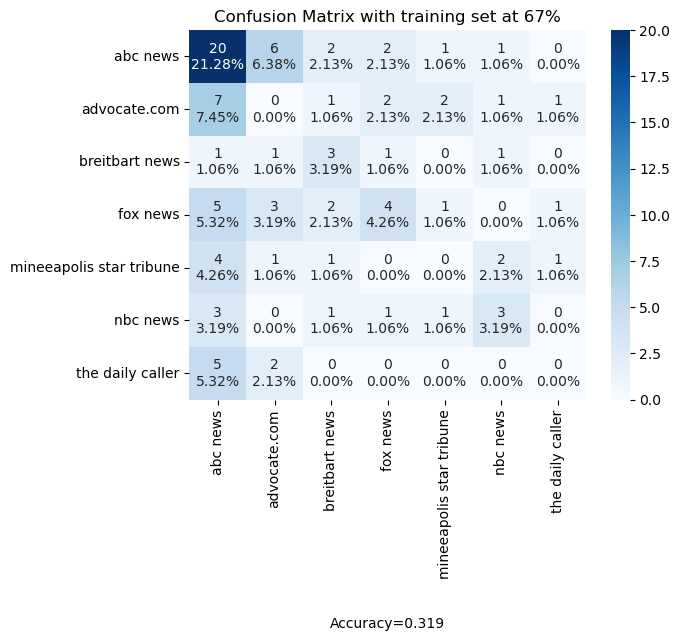

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
cnf_matrix = confusion_matrix(y_test, y_pred)
print("\nThe confusion matrix is:")
print(cnf_matrix)

#labels = ['True Neg', 'False Pos', 'False Neg', "True Pos"]
categories = ["abc news", "advocate.com", "breitbart news", "fox news", "mineeapolis star tribune", "nbc news", "the daily caller"]
make_confusion_matrix(cnf_matrix,
                      #group_names = labels,
                      categories=categories,
                     title = "Confusion Matrix with training set at 67%",
                     xyplotlabels=False)

In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

                          precision    recall  f1-score   support

                 abcnews       0.41      0.69      0.52        67
             advocatecom       0.21      0.21      0.21        29
           breitbartnews       0.00      0.00      0.00        14
                 foxnews       0.25      0.15      0.19        33
minneapolis star tribune       0.05      0.05      0.05        19
                 nbcnews       0.40      0.11      0.17        18
        the daily caller       0.11      0.07      0.08        15

                accuracy                           0.31       195
               macro avg       0.21      0.18      0.18       195
            weighted avg       0.27      0.31      0.27       195

